In [2]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Plotting style
sns.set_theme(style="darkgrid")
%matplotlib inline

# Load the cleaned data
df = pd.read_csv('../data/processed/AAPL_stock_data_cleaned.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Check structure
print(df.head())
print(df.dtypes)


                         Close                High                 Low  \
Date                                                                     
NaT                       AAPL                AAPL                AAPL   
2018-01-02  40.426822662353516  40.436212064432425   39.72276790875693   
2018-01-03   40.41978073120117     40.964251437036  40.356418384321046   
2018-01-04    40.6075325012207   40.71079444172855    40.3845825374921   
2018-01-05   41.06986999511719   41.15670228861273   40.61223501708758   

                          Open     Volume  
Date                                       
NaT                       AAPL       AAPL  
2018-01-02    39.9339864834405  102223600  
2018-01-03  40.490186919853265  118071600  
2018-01-04   40.49253559819918   89738400  
2018-01-05    40.7037620126935   94640000  
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object


In [5]:
df.describe()

,Close,High,Low,Open,Volume
count,1761,1761,1761,1761,1761
unique,1742,1761,1761,1761,1757
top,53.85440444946289,252.8899685500744,250.14658624824915,251.62302046123375,146118800
freq,2,1,1,1,2


In [6]:
df.isnull().sum()


Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [9]:
# Convert all columns (except Date index) to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaNs (optional but recommended for plotting)
df.dropna(inplace=True)

# Confirm again
print(df.dtypes)


Close     float64
High      float64
Low       float64
Open      float64
Volume    float64
dtype: object


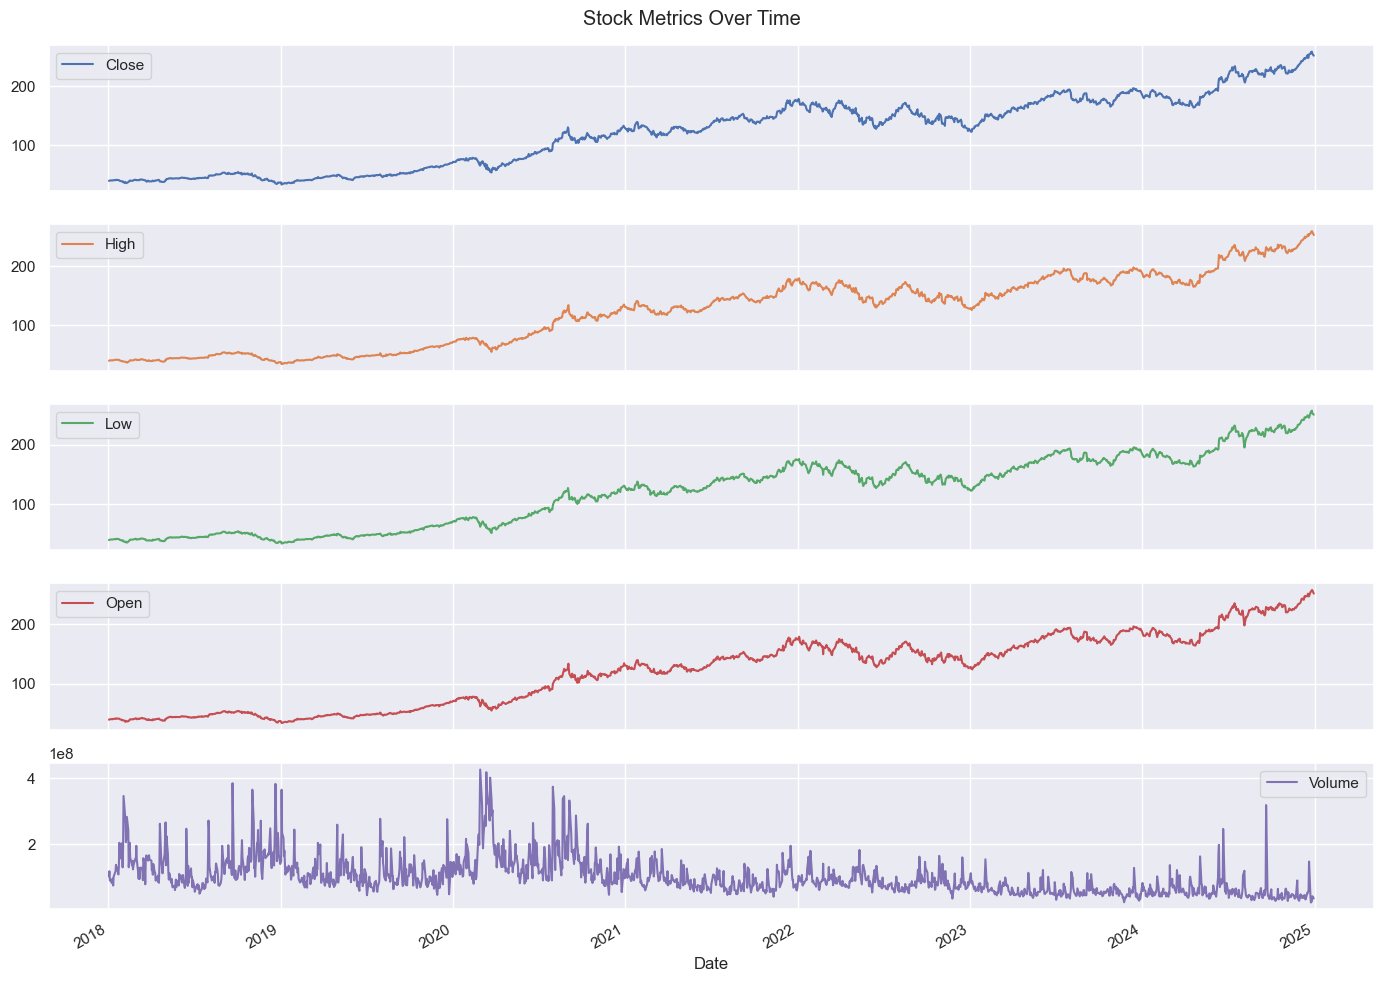

In [10]:
df.plot(subplots=True, figsize=(14, 10), title='Stock Metrics Over Time')
plt.tight_layout()
plt.show()


In [11]:
print(df.dtypes)

Close     float64
High      float64
Low       float64
Open      float64
Volume    float64
dtype: object


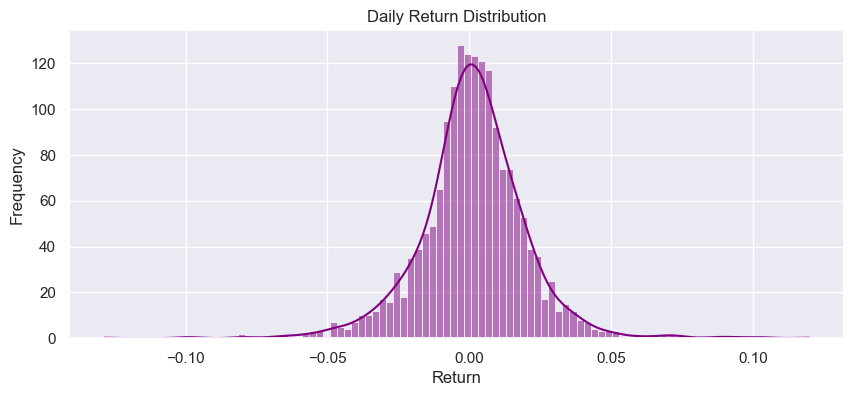

In [12]:
df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(10, 4))
sns.histplot(df['Daily Return'].dropna(), bins=100, kde=True, color='purple')
plt.title('Daily Return Distribution')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()


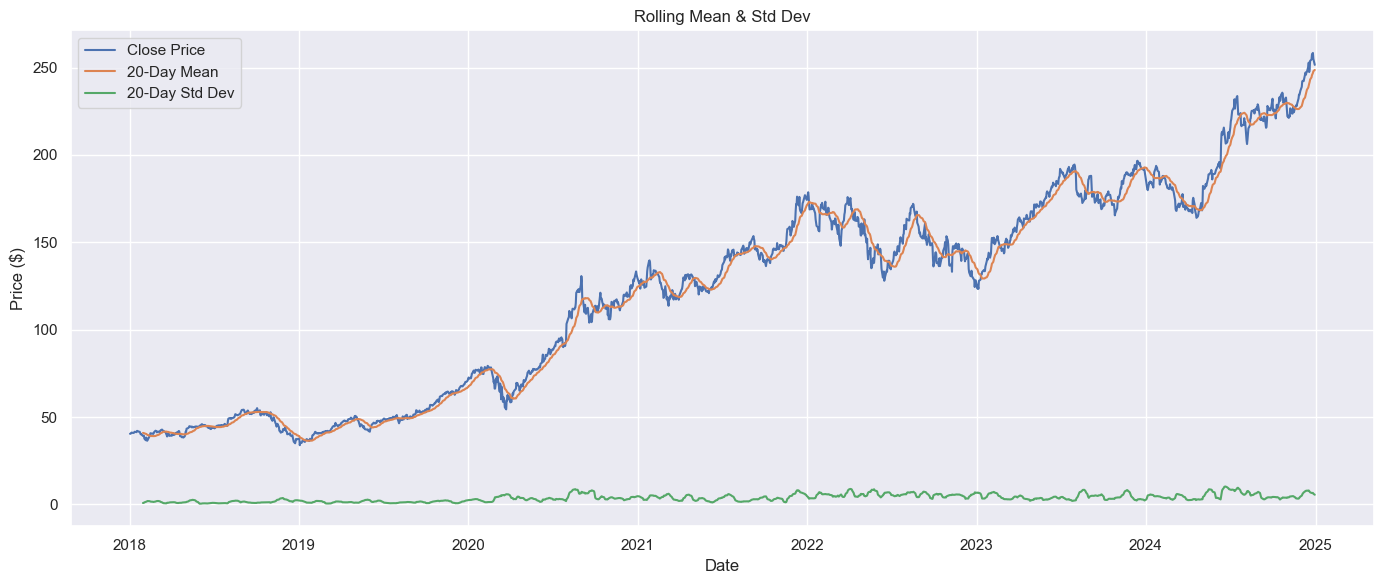

In [13]:
df['Rolling Mean'] = df['Close'].rolling(window=20).mean()
df['Rolling Std'] = df['Close'].rolling(window=20).std()

plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['Rolling Mean'], label='20-Day Mean')
plt.plot(df['Rolling Std'], label='20-Day Std Dev')
plt.title('Rolling Mean & Std Dev')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


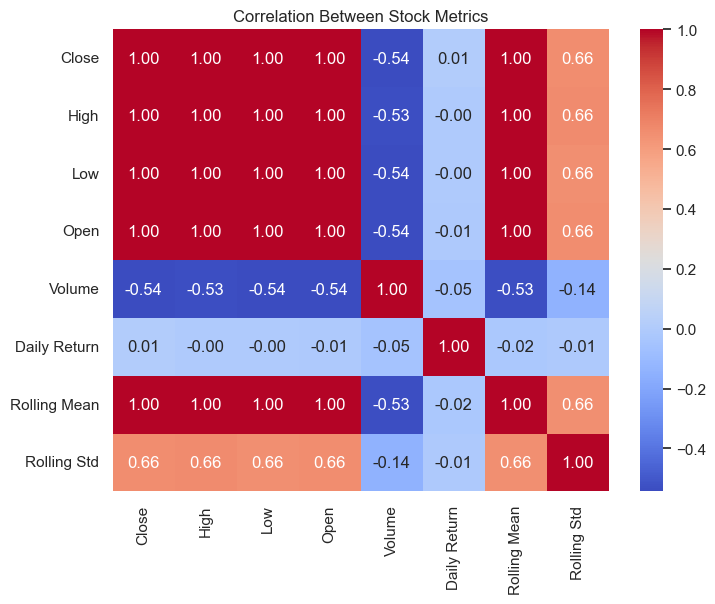

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Stock Metrics')
plt.show()
